![BAIME banner](https://user-images.githubusercontent.com/47600826/89530907-9b3f6480-d7ef-11ea-9849-27617f6025cf.png)

# Customer Lifetime Value prediction

![CLV](https://www.searchwarrant.ca/wp-content/uploads/sites/99/2020/04/LTV_ConversionRate_Part2800x420.png)

# The problem

In this notebook we look at the data we got via this [Kaggle dataset](https://www.kaggle.com/saniyajaswani/credit-card-data). 
It involves the car insurance customer lifetime value.

Customer Lifetime Value Prediction( CLV ) value refers to net profit attributed to the entire future relationship with a customer. 
A bank will use different predictive analytic approaches to predict the revenue that can be generated from any customer in the future. 
This helps the banks in segmentating the customers in specific groups based on their CLV.

Identifying customers with high future values will enable the organization to keep maintaining good relationships with such customers. 
It can be done by investing more time and resources on them such as better prices, offers, discounts, customer care services, etc.

Finding and engaging reliable and profitable customers has always been a great challenge for banks.
With the increasing competition, the banks need to keep a check on each and every activity of their customers for utilizing their resources effectively. 

To solve this problem, Data Science in banking is being used for extracting actionable insights concerning customer behaviors and expectations.
Using Data Science models for predicting the CLV of a customer will help a bank to take some suitable decisions for their growth and profit.


![CLV](https://2112leafletdistribution.co.uk/wp-content/uploads/2018/03/CLV.png)

# Import the important libraries / packages
These packages are needed to load and use the dataset

In [1]:
import pandas as pd #we use this to load, read and transform the dataset
import numpy as np #we use this for statistical analysis
import matplotlib.pyplot as plt #we use this to visualize the dataset
import seaborn as sns #we use this to make countplots
import sklearn.metrics as sklm #This is to test the models

# Load and explore the dataset
The data is all in one csv file. In this next step I will first load the data to see how this looks like

In [2]:
#here we load the data
data = pd.read_csv(r'C:\Users\Renate\Documents\GitHub\Data-Projects\Kaggle\Kaggle - Customer Lifetime Value\Data CLV.csv')

#and immediately I would like to see how this dataset looks like
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
#now let's look closer at the dataset we got
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

It seems that we have a lot of text / category information (these are of the Dtype 'object') and a few numerical columns (Dtypes 'int64' and 'float64'). 

The column 'Customer Lifetime Value' is the column we would like to predict. 

In [4]:
data.shape

(9134, 24)

The dataset consists of 9134 rows and 24 columns. 

In [5]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


It seems that we have some strange outliers for the CLV and claim amounts. We will look and handle these later on. 

In [6]:
data.describe(include='O')

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,TY84623,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [7]:
#Let's see what the options are in the text columns with two or three options (the objects)
print('Response: '+ str(data['Response'].unique()))
print('Coverage: '+ str(data['Coverage'].unique()))
print('Education: '+ str(data['Education'].unique()))
print('Employment Status: '+ str(data['EmploymentStatus'].unique()))
print('Gender: ' + str(data['Gender'].unique()))
print('Location Code: ' + str(data['Location Code'].unique()))
print('Married: ' + str(data['Marital Status'].unique()))
print('Policy Type: ' + str(data['Policy Type'].unique()))
print('Vehicle Size: ' + str(data['Vehicle Size'].unique()))


Response: ['No' 'Yes']
Coverage: ['Basic' 'Extended' 'Premium']
Education: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Employment Status: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Gender: ['F' 'M']
Location Code: ['Suburban' 'Rural' 'Urban']
Married: ['Married' 'Single' 'Divorced']
Policy Type: ['Corporate Auto' 'Personal Auto' 'Special Auto']
Vehicle Size: ['Medsize' 'Small' 'Large']


# Customer Lifetime Value 

As Customer Lifetime Value is the column we want to predict, let's explore this column in the training dataset.

The formula to calculate the CLV:

![CLV formula](https://d35fo82fjcw0y8.cloudfront.net/2018/08/30131556/calculation-for-customer-lifetime-value.jpg)

(array([7.260e+03, 1.193e+03, 4.130e+02, 1.540e+02, 7.500e+01, 2.000e+01,
        1.000e+01, 5.000e+00, 3.000e+00, 1.000e+00]),
 array([ 1898.007675 , 10040.7450265, 18183.482378 , 26326.2197295,
        34468.957081 , 42611.6944325, 50754.431784 , 58897.1691355,
        67039.906487 , 75182.6438385, 83325.38119  ]),
 <a list of 10 Patch objects>)

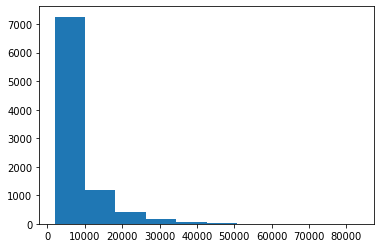

In [8]:
#As this is a numeric, thus continous number, I will use a scatterplot to see if there is a pattern. 
plt.hist(data['Customer Lifetime Value'])

As you can see here, the data is extremely skewed. Let's make a boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x25908b2cdd8>,
 'caps': [<matplotlib.lines.Line2D at 0x25908b3d518>,
 'boxes': [<matplotlib.lines.Line2D at 0x25908b2ca20>],
 'medians': [<matplotlib.lines.Line2D at 0x25908b3dba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x25908b3def0>],
 'means': []}

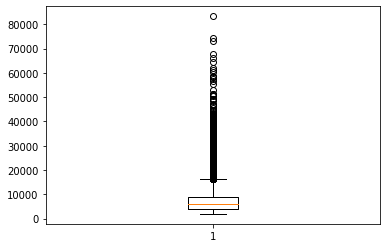

In [9]:
plt.boxplot(data['Customer Lifetime Value'])

In [10]:
#We see that there are some great outliers here. 
#let's look closer to these outliers over 50000
outliers = data[data['Customer Lifetime Value'] > 50000]
outliers.head(25)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
79,OM82309,California,58166.55351,No,Basic,Bachelor,2/27/11,Employed,M,61321,...,30,1,2,Personal Auto,Personal L3,Offer2,Branch,427.631210,Luxury Car,Small
1974,YC54142,Washington,74228.51604,No,Extended,High School or Below,1/26/11,Unemployed,M,0,...,34,0,2,Personal Auto,Personal L1,Offer1,Branch,1742.400000,Luxury Car,Medsize
2190,KI58952,California,51337.90677,No,Premium,College,2/24/11,Employed,F,72794,...,47,1,2,Personal Auto,Personal L2,Offer1,Web,50.454459,SUV,Large
2908,EN65835,Arizona,58753.88046,No,Premium,Bachelor,1/6/11,Employed,F,24964,...,84,0,2,Personal Auto,Personal L2,Offer2,Agent,888.000000,SUV,Medsize
3145,CL79250,Nevada,52811.49112,No,Basic,Bachelor,1/8/11,Unemployed,M,0,...,70,0,2,Corporate Auto,Corporate L2,Offer2,Agent,873.600000,Luxury Car,Small
3760,AZ84403,Oregon,61850.18803,No,Extended,College,2/4/11,Unemployed,F,0,...,29,0,2,Personal Auto,Personal L1,Offer3,Branch,1142.400000,Luxury SUV,Medsize
4126,JT47995,Arizona,60556.19213,No,Extended,College,1/1/11,Unemployed,F,0,...,45,0,2,Personal Auto,Personal L3,Offer1,Web,979.200000,Luxury SUV,Large
4915,DU50092,Oregon,56675.93768,No,Premium,College,1/24/11,Employed,F,77237,...,93,0,2,Personal Auto,Personal L1,Offer4,Web,1358.400000,Luxury SUV,Medsize
5279,SK66747,Washington,66025.75407,No,Basic,Bachelor,2/22/11,Employed,M,33481,...,46,0,2,Personal Auto,Personal L3,Offer1,Agent,1194.892002,Luxury SUV,Medsize
5716,FQ61281,Oregon,83325.38119,No,Extended,High School or Below,1/31/11,Employed,M,58958,...,74,0,2,Personal Auto,Personal L3,Offer1,Call Center,1108.800000,Luxury Car,Small


In [11]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 79 to 8825
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       20 non-null     object 
 1   State                          20 non-null     object 
 2   Customer Lifetime Value        20 non-null     float64
 3   Response                       20 non-null     object 
 4   Coverage                       20 non-null     object 
 5   Education                      20 non-null     object 
 6   Effective To Date              20 non-null     object 
 7   EmploymentStatus               20 non-null     object 
 8   Gender                         20 non-null     object 
 9   Income                         20 non-null     int64  
 10  Location Code                  20 non-null     object 
 11  Marital Status                 20 non-null     object 
 12  Monthly Premium Auto           20 non-null     in

Looks like there are only 20 rows of the 9134 rows that have a lifetime value of more than 50000. 
What will happen if we leave them out of the dataset? 

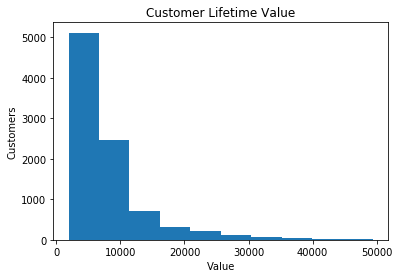

In [12]:
#without the 20 outliers: 
data = data[data['Customer Lifetime Value'] < 50000]
plt.hist(data['Customer Lifetime Value'], bins = 10)
plt.title("Customer Lifetime Value") #Assign title 
plt.xlabel("Value") #Assign x label 
plt.ylabel("Customers") #Assign y label 
plt.show()

# Handling missing values
Let's continue with handling the missing values in this dataset. 
Let's see where and how many missing values there are in this dataset.  

In [13]:
#let's look in what columns there are missing values 
data.isnull().sum().sort_values(ascending = False)

Vehicle Size                     0
Vehicle Class                    0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Customer                         0
dtype: int64

There seem to be no missing values in this dataset. 

## Making the text columns Numeric
We first need to make all column input numeric to use them further on. 
This is what I will do now. 

In [14]:
#First we drop the customer column, as this is a unique identifier and will bias the model
data = data.drop(labels = ['Customer'], axis = 1)

In [15]:
#let's load the required packages
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#from sklearn.compose import ColumnTransformer
#columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
#see for use: https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b


In [16]:
# Let's transform the categorical variables to continous variables
column_names = ['Response', 'Coverage', 'Education', 
                     'Effective To Date', 'EmploymentStatus', 
                     'Gender', 'Location Code', 'Marital Status',
                     'Policy Type', 'Policy', 'Renew Offer Type',
                     'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'State']

for col in column_names:
    data[col] = le.fit_transform(data[col])
    
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,47,1,0,56274,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,24,4,0,0,1,...,42,0,8,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,41,1,0,48767,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,12,4,1,0,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,52,1,1,43836,0,...,44,0,1,1,3,0,0,138.130879,0,1


In [17]:
data.dtypes

State                              int32
Customer Lifetime Value          float64
Response                           int32
Coverage                           int32
Education                          int32
Effective To Date                  int32
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Renew Offer Type                   int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int32
dtype: object

As my model can not handle floats, we will change these to integers.

In [18]:
data['Customer Lifetime Value'] = data['Customer Lifetime Value'].astype(int)
data['Total Claim Amount'] = data['Total Claim Amount'].astype(int)


# Most important features
Let's continue by looking at the most important features according to two different tests. 
Than we will use the top ones to train and test our first model. 

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Name of the column','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Name of the column         Score
7                          Income  1.657890e+08
19             Total Claim Amount  1.412978e+06
12  Months Since Policy Inception  1.068661e+05
10           Monthly Premium Auto  1.007941e+05
4               Effective To Date  6.635854e+04
11        Months Since Last Claim  4.479610e+04
20                  Vehicle Class  1.495604e+04
14             Number of Policies  1.455721e+04
13      Number of Open Complaints  1.453685e+04
3                       Education  8.159118e+03


In [19]:
#First we need to split the dataset in the y-column (the target) and the components (X), the independent columns. 
#This is needed as we need to use the X columns to predict the y in the model. 

y = data['Customer Lifetime Value'] #the column we want to predict 
X = data.drop(labels = ['Customer Lifetime Value'], axis = 1)  #independent columns 
 

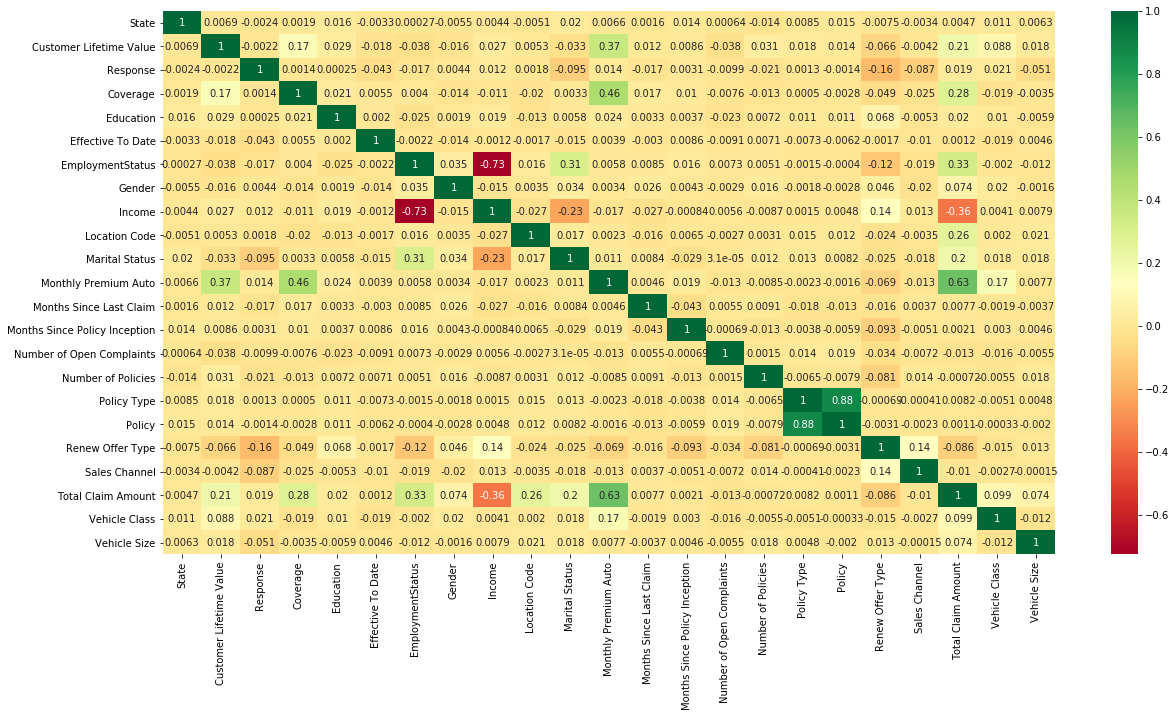

In [21]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

What pop's out when looking at the correlations for the CLV is the column 'Monthly Premium Auto' and the 'Total Claim Amount'
These might be the best features to use.

Seems that the feature selection models differ a bit in which feature is the most important.
For the first test I will keep:
- Total Claim Amount (high in all both tests)
- Monthly Premium Auto (high in all both tests and the highest in the correlation)
- Income (high in two tests)
- Months Since Policy Inception (High in the best features test)
- Coverage (High in the correlation)



# Machine learning Model
We want to predict a continous number, therefore we need a linear regression model.



In [22]:
from sklearn.linear_model import LinearRegression

## Split the dataset in train and test
Before we are going to use the model choosen, we will first split the dataset in a train and test set.
This because we want to test the performance of the model on the training set and to be able to check it's accuracy. 

In [23]:
from sklearn.model_selection import train_test_split

#First try with the 5 most important features
X_5 = data[['Total Claim Amount', 'Monthly Premium Auto', 'Income', 'Coverage', 'Months Since Policy Inception']] #independent columns chosen 
y = data['Customer Lifetime Value']    #target column 

#I want to withhold 30 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X_5,y, test_size=0.3 , random_state = 25)

In [24]:
print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of X_train is:  (6379, 6)
Shape of X_test is:  (2735, 6)
Shape of Y_train is:  (6379,)
Shape of y_test is:  (2735,)


In [25]:
#To check the model, I want to build a check:
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   


## Linear Regression on 5 features
Let's try the model

In [26]:
# Linear regression model
model_5 = LinearRegression() 
model_5.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
Predictions = model_5.predict(X_test)
print_metrics(y_test, Predictions, 5)

Mean Square Error      = 35733251.039806016
Root Mean Square Error = 5977.729589050178
Mean Absolute Error    = 3755.875083721835
Median Absolute Error  = 2981.6324351002604
R^2                    = 0.13580732360174186
Adjusted R^2           = 0.13454110722606674


## Linear Regression on all
Let's try the model

In [28]:
#I want to withhold 30 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3 , random_state = 25)

print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of X_train is:  (6379, 22)
Shape of X_test is:  (2735, 22)
Shape of Y_train is:  (6379,)
Shape of y_test is:  (2735,)


In [29]:
# Linear regression model
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
Predictions = model.predict(X_test)
print_metrics(y_test, Predictions, 22)

Mean Square Error      = 35571990.11378946
Root Mean Square Error = 5964.225860393741
Mean Absolute Error    = 3785.077765752123
Median Absolute Error  = 2756.786415983239
R^2                    = 0.13970734689090358
Adjusted R^2           = 0.13304824415765956


# Conclusion

This model does not perform well to predict the CLV.

We could try different models or improve the features and feature selection
Or we could try to use the formula as above to make the predictions. 



In [31]:
#from site https://planspace.org/20150423-forward_selection_with_statsmodels/

import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {}".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [32]:
# Poisson regression code
import statsmodels.api as sm
exog, endog = sm.add_constant(X), y
mod = sm.GLM(endog, exog,
             family=sm.families.Poisson(link=sm.families.links.log))
res = mod.fit()

C:\Users\Renate\Anaconda3\ANACONDA\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """


In [33]:
display(res.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     Customer Lifetime Value   No. Observations:                 9114
Model:                                 GLM   Df Residuals:                     9091
Model Family:                      Poisson   Df Model:                           22
Link Function:                         log   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:            -1.4884e+07
Date:                     Thu, 08 Oct 2020   Deviance:                   2.9671e+07
Time:                             21:21:25   Pearson chi2:                 3.96e+07
No. Iterations:                          7                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             8.3185      0.001   9700.653      0.000       8.317       8.320
State                             0.0015   9.18e-05     16.351      0.000       0.001       0.002
Response                         -0.0495      0.000   -143.294      0.000      -0.050      -0.049
Coverage                          0.0228      0.000    119.756      0.000       0.022       0.023
Education                         0.0139   8.52e-05    163.030      0.000       0.014       0.014
Effective To Date                -0.0009   6.95e-06   -131.483      0.000      -0.001      -0.001
EmploymentStatus                 -0.0122      0.000    -92.404      0.000      -0.012      -0.012
Gender                           -0.0196      0.000    -82.225      0.000      -0.020      -0.019
Income                         3.327e-07    5.8e-09     57.348      0.000    3.21e-07    3.44e-07
Location Code                     0.0133      0.000     63.543      0.000       0.013       0.014
Marital Status                   -0.0354      0.000   -178.555      0.000      -0.036      -0.035
Monthly Premium Auto              0.0067   4.36e-06   1545.974      0.000       0.007       0.007
Months Since Last Claim           0.0007   1.17e-05     59.430      0.000       0.001       0.001
Months Since Policy Inception    -0.0001   4.26e-06    -28.952      0.000      -0.000      -0.000
Number of Open Complaints        -0.0330      0.000   -242.140      0.000      -0.033      -0.033
Number of Policies                0.0099   4.87e-05    202.468      0.000       0.010       0.010
Policy Type                       0.0532      0.001    101.827      0.000       0.052       0.054
Policy                           -0.0064      0.000    -41.693      0.000      -0.007      -0.006
Renew Offer Type                 -0.0444      0.000   -356.728      0.000      -0.045      -0.044
Sales Channel                     0.0034      0.000     30.331      0.000       0.003       0.004
Total Claim Amount            -5.481e-05   5.83e-07    -94.035      0.000    -5.6e-05   -5.37e-05
Vehicle Class                     0.0181   5.98e-05    302.210      0.000       0.018       0.018
Vehicle Size                      0.0222      0.000    100.281      0.000       0.022       0.023
=================================================================================================
"""

Text(0, 0.5, 'Y')

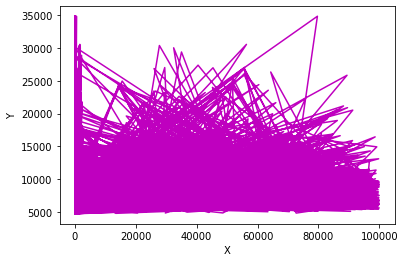

In [34]:
y_pred = res.predict(exog)

#idx = X.index.sort_values()
x_ord, y_pred_ord = X, y_pred
plt.plot(x_ord, y_pred_ord, color='m')
#plt.scatter(X, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")

In [35]:
data = data.rename(columns = {'Marital Status': 'Marital_Status', 'Effective To Date' : 'Effective_to_Date', 
                              'Location Code': 'Location_Code', 'Monthly Premium Auto': 'Monthly_Premium_Auto',
                              'Months Since Last Claim': 'Months_Since_Last_Claim', 
                              'Months Since Policy Inception': 'Months_Since_Policy_Inception',
                              'Number of Open Complaints': 'Number_of_Open_Complaints',
                              'Number of Policies': 'Number_of_Policies',
                              'Policy Type': 'Policy_Type', 'Renew Offer Type': 'Renew_Offer_Type',
                              'Sales Channel': 'Sales_Channel', 'Total Claim Amount': 'Total_Claim_Amount',
                              'Vehicle Class': 'Vehicle_Class', 'Vehicle Size': 'Vehicle_Size',
                             'Customer Lifetime Value': 'CLV'})
model_new = forward_selected(data, 'CLV')



In [36]:
print(model_new.rsquared_adj)

0.14590556329339488


In [37]:
print(model_new.model.formula)

CLV ~ Monthly_Premium_Auto + Renew_Offer_Type + EmploymentStatus + Number_of_Open_Complaints + Number_of_Policies + Marital_Status + Vehicle_Class + Education + Policy_Type + Effective_to_Date + Response + Vehicle_Size + Total_Claim_Amount + Gender + Months_Since_Last_Claim


<class 'statsmodels.iolib.summary.Summary'>
"""
                    Generalized Linear Model Regression Results                    
===================================================================================
Dep. Variable:     Customer Lifetime Value   No. Observations:                 9114
Model:                                 GLM   Df Residuals:                     9091
Model Family:                     Gaussian   Df Model:                           22
Link Function:                         log   Scale:                      3.5563e+07
Method:                               IRLS   Log-Likelihood:                -92152.
Date:                     Thu, 08 Oct 2020   Deviance:                   3.2330e+11
Time:                             21:21:39   Pearson chi2:                 3.23e+11
No. Iterations:                         10                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             8.3787      0.055    152.717      0.000       8.271       8.486
State                             0.0011      0.006      0.190      0.849      -0.010       0.013
Response                         -0.0880      0.023     -3.862      0.000      -0.133      -0.043
Coverage                          0.0132      0.012      1.122      0.262      -0.010       0.036
Education                         0.0143      0.005      2.627      0.009       0.004       0.025
Effective To Date                -0.0008      0.000     -1.824      0.068      -0.002    6.08e-05
EmploymentStatus                 -0.0161      0.008     -1.895      0.058      -0.033       0.001
Gender                           -0.0134      0.015     -0.871      0.384      -0.043       0.017
Income                         3.409e-07   3.71e-07      0.918      0.359   -3.87e-07    1.07e-06
Location Code                     0.0145      0.013      1.079      0.281      -0.012       0.041
Marital Status                   -0.0339      0.013     -2.655      0.008      -0.059      -0.009
Monthly Premium Auto              0.0061      0.000     25.317      0.000       0.006       0.007
Months Since Last Claim           0.0003      0.001      0.345      0.730      -0.001       0.002
Months Since Policy Inception  9.036e-05      0.000      0.329      0.742      -0.000       0.001
Number of Open Complaints        -0.0298      0.009     -3.272      0.001      -0.048      -0.012
Number of Policies                0.0100      0.003      3.262      0.001       0.004       0.016
Policy Type                       0.0593      0.034      1.758      0.079      -0.007       0.125
Policy                           -0.0091      0.010     -0.921      0.357      -0.029       0.010
Renew Offer Type                 -0.0486      0.008     -5.994      0.000      -0.065      -0.033
Sales Channel                     0.0103      0.007      1.433      0.152      -0.004       0.024
Total Claim Amount            -4.377e-05   3.35e-05     -1.305      0.192      -0.000    2.19e-05
Vehicle Class                     0.0207      0.004      5.148      0.000       0.013       0.029
Vehicle Size                      0.0275      0.014      1.923      0.054      -0.001       0.056
=================================================================================================
"""

ValueError: x and y must be the same size

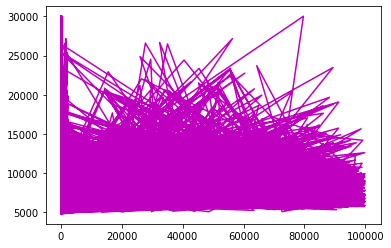

In [38]:
exog = sm.add_constant(X)
endog = y

# Normal distribution + log link function
mod = sm.GLM(endog, exog, family=sm.families.Gaussian(sm.families.links.log()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

#idx = x.argsort()
x_ord, y_pred_ord = X, y_pred

plt.plot(x_ord, y_pred_ord, color='m')
plt.scatter(X, y,  s=20, alpha=0.8)
plt.xlabel("X")
plt.ylabel("Y")
# plt.savefig('custom_GLM_fit.png')

In [ ]:
import Model_selection
ms = Model_selection.model_train(modelBase=data, target="Customer Lifetime Value", learning_curve=False, scoring="neg_log_loss", automated=True, n_jobs=-1, models=["random_forest"])